# Decision Theory Application on Titanic

## Import of required modules and libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
!pip install translate
from translate import Translator
print("Required libraries and modules imported successfully!")

import warnings
warnings.filterwarnings("ignore")
print("Warnings will be ignored")

Required libraries and modules imported successfully!
Warnings will be ignored


## Read Datasets

In [2]:
df = pd.read_csv("/content/titanic_preprocessed.csv")
df_predict = pd.read_csv("/content/titanic_preprocessed2.csv")
df2 = df_predict
print("Dataset imported!")

Dataset imported!


## Dimension of Datasets

In [3]:
print("Number of rows in the training set is : ", df.shape[0])
print("Number of columns in the training set is : ", df.shape[1])

Number of rows in the training set is :  891
Number of columns in the training set is :  13


In [4]:
print("Number of rows in the training set is : ", df2.shape[0])
print("Number of columns in the training set is : ", df2.shape[1])

Number of rows in the training set is :  418
Number of columns in the training set is :  12


## Columns

In the previous section, we found that the datasets have 13 and 12 columns, respectively. The names of the columns are shown in the following output.

In [5]:
pd.DataFrame(
    df.columns, 
    columns = ['Column Names'],
    index = range(1, len(df.columns)+1, 1)
)

,Column Names
1,PassengerId
2,Title
3,FirstName
4,LastName
5,Survived
6,Pclass
7,Sex
8,Age
9,SibSp
10,Parch


In [6]:
pd.DataFrame(
    df2.columns, 
    columns = ['Column Names'],
    index = range(1, len(df2.columns)+1, 1)
)

,Column Names
1,PassengerId
2,Title
3,FirstName
4,LastName
5,Pclass
6,Sex
7,Age
8,SibSp
9,Parch
10,Ticket


## Sample outlook on the datasets

In [7]:
df.sample(5)

,PassengerId,Title,FirstName,LastName,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
312,313,Mrs,William (Anna Sylfven),Lahtinen,0,2,female,26.000000,1,1,250651,2.89,S
629,630,Mr,Patrick D,O'Connell,0,3,male,31.184045,0,0,334912,7.73,Q
533,534,Mrs,Catherine (Catherine Rizk),Peter,1,3,female,35.449074,0,2,2668,2.48,C
101,102,Mr,"Pastcho (""Pentcho"")",Petroff,0,3,male,31.184045,0,0,349215,7.90,S
377,378,Mr,Harry Elkins,Widener,0,1,male,27.000000,0,2,113503,23.50,C


In [8]:
df2.sample(5)

,PassengerId,Title,FirstName,LastName,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
43,935,Mrs,Walter H (Irene Colvin),Corbett,2,female,30.000000,0,0,237249,13.0000,S
273,1165,Miss,Mary,Lennon,3,female,21.887422,1,0,370371,15.5000,Q
304,1196,Miss,"Catherine Katie""""",McCarthy,3,female,21.887422,0,0,383123,7.7500,Q
151,1043,Mr,Nicola,Matinoff,3,male,30.250000,0,0,349255,7.8958,C
280,1172,Miss,Jelka,Oreskovic,3,female,23.000000,0,0,315085,8.6625,S


## Data Pre-processing and Feature Engineering

### Removing Columns

The columns **PassengerId**, **FirstName**, **LastName** and **Ticket** will be removed as these columns have too much unique values.

In [9]:
df = df.drop(
        ["PassengerId", "FirstName", "LastName", "Ticket"],
        axis = 1
    )
print("Columns removed!")

Columns removed!


In [10]:
df2 = df2.drop(
        ["PassengerId", "FirstName", "LastName", "Ticket"],
        axis = 1
    )
print("Columns removed!")

Columns removed!


### Feature Engineering on "Title"

In [11]:
pd.DataFrame(
    index = [title for title in df["Title"].unique()],
    data = [(df["Title"][df["Title"] == title].count()) for title in df["Title"].unique()],
    columns = ["Count"]
)

,Count
Mr,517
Mrs,125
Miss,182
Master,40
Don,1
Rev,6
Dr,7
Mme,1
Ms,1
Major,2


It is clear from the above output, that the  count of the titles other than Mr, Mrs, Miss, Master are less than 10. 

Moreover, the titles "Mme" and "Mlle", respectively, stands for "Mrs" and "Mademoiselle" or "Miss".

In [12]:
translator = Translator(to_lang = "French")
translator.translate("Mme")

'Mrs'

In [13]:
translator = Translator(to_lang = "French")
translator.translate("Mlle")

'Mademoiselle'

So, "Mme" and "Mlle", respectively, will be replaced by, "Mrs" and "Miss".

"Ms" will also be replaced by "Miss".

The titles, "Don", "Rev", "Dr", "Major", "Lady", "Sir", "Col", "Capt", "the" and "Jonkheer" will be replaced by "Other_title".

In [14]:
replace_list = ["Don", "Rev", "Dr", "Mme", "Ms", "Major", "Lady", "Sir", "Mlle", "Col", "Capt", "the", "Jonkheer"]

for title in replace_list :
    if title == "Mme" :
        df["Title"].replace(
            {
                title : "Mrs"
            },
            inplace = True
        )
    elif (title == "Mlle") | (title == "Ms") :
        df["Title"].replace(
            {
                title : "Mrs"
            },
            inplace = True
        )
    else :
        df["Title"].replace(
            {
                title : "Other_title"
            },
            inplace = True
        )
print("Titles are changed")

Titles are changed


In [15]:
pd.DataFrame(
    index = [title for title in df["Title"].unique()],
    data = [(df["Title"][df["Title"] == title].count()) for title in df["Title"].unique()],
    columns = ["Count"]
)

,Count
Mr,517
Mrs,129
Miss,182
Master,40
Other_title,23


In [16]:
df["Title"].replace(
    {
        "Mr" : 0,
        "Mrs" : 1,
        "Miss" : 2,
        "Master" : 3,
        "Other_title" : 4
    },
    inplace = True
)

print("Titles Renamed!")

Titles Renamed!


In [17]:
replace_list = ["Don", "Rev", "Dr", "Mme", "Ms", "Major", "Lady", "Sir", "Mlle", "Col", "Capt", "the", "Jonkheer"]

for title in replace_list :
    if title == "Mme" :
        df2["Title"].replace(
            {
                title : "Mrs"
            },
            inplace = True
        )
    elif (title == "Mlle") | (title == "Ms") :
        df2["Title"].replace(
            {
                title : "Mrs"
            },
            inplace = True
        )
    else :
        df2["Title"].replace(
            {
                title : "Other_title"
            },
            inplace = True
        )
print("Titles are changed")

Titles are changed


In [18]:
df2["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other_title', 'Dona'], dtype=object)

In [19]:
df2["Title"].replace(
    {
        "Mr" : 0,
        "Mrs" : 1,
        "Miss" : 2,
        "Master" : 3,
        "Dona" : 4,
        "Other_title" : 4
    },
    inplace = True
)

print("Titles Renamed!")

Titles Renamed!


### Categorizing "Age"

The Age is a continuous type of data. So we will categorize the column.

But before that, we need to look at the minimum and maximum values attained in the Age column.

In [20]:
print("Minimum Age : ", min(df["Age"]))
print("Maximum Age : ", max(df["Age"]))

Minimum Age :  0.42
Maximum Age :  80.0


We can categorize the age column as follows :

Range of Age | Categories | Denotions
:-----------:|:----------:|:---------:
0 - 5	     | Infant     | 0
5 - 12	     | Child      | 1
12 - 19	     | Teenager   | 2
19 - 35	     | Young Adult| 3
35 - 55	     | Middle Aged| 4
55 - 65	     | Adult      | 5
> 65	     | Senior     | 6

So, we will categorize the Age column in a new column named "Age Group" and then remove the "Age" column.

In [21]:
df["Age Group"] = pd.cut(
                    df["Age"],
                    bins = [0, 5, 12, 19, 35, 55, 65, 87],
                    right = True,
                    labels = [0, 1, 2, 3, 4, 5, 6]
                  )

df = df.drop(["Age"], axis = 1)

In [22]:
df2["Age Group"] = pd.cut(
                    df2["Age"],
                    bins = [0, 5, 12, 19, 35, 55, 65, 87],
                    right = True,
                    labels = [0, 1, 2, 3, 4, 5, 6]
                  )

df2 = df2.drop(["Age"], axis = 1)

### Categorizing "Fare"

The Fare is a continuous type of data. So we will categorize the column.

But before that, we need to look at the minimum and maximum values attained in the Fare column.

In [23]:
print("Minimum Fare : ", min(df["Fare"]))
print("Maximum Fare : ", max(df["Fare"]))

Minimum Fare :  0.16
Maximum Fare :  512.33


As the range of the fares is high, so this column will be categorized using deciles. Then the "Fare" column will be removed.

In [24]:
df["Fare Group"] = pd.qcut(
                    df["Fare"],
                    q = 10,
                    labels = False
                  )

df = df.drop(["Fare"], axis = 1)

In [25]:
df2["Fare Group"] = pd.qcut(
                    df2["Fare"],
                    q = 10,
                    labels = False
                  )

df2 = df2.drop(["Fare"], axis = 1)

### Rename Categories in "Sex" and "Embarked"

#### Sex

In [26]:
df["Sex"].replace(
    {
        "male" : 0,
        "female" : 1
    },
    inplace = True
)

In [27]:
df2["Sex"].replace(
    {
        "male" : 0,
        "female" : 1
    },
    inplace = True
)

#### Embarked

In [28]:
df["Embarked"].replace(
    {
        "C" : 0,
        "Q" : 1,
        "S" : 2
    },
    inplace = True
)

In [29]:
df2["Embarked"].replace(
    {
        "C" : 0,
        "Q" : 1,
        "S" : 2
    },
    inplace = True
)

## Sample outlook on the dataset after Pre-processing

In [30]:
df.sample(15)

,Title,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age Group,Fare Group
871,1,1,1,1,1,1,2,4,2
361,0,0,2,0,1,0,0,3,2
382,0,0,3,0,0,0,2,3,5
273,0,0,1,0,0,1,0,4,3
118,0,0,1,0,0,1,0,3,9
614,0,0,3,0,0,0,2,3,5
640,0,0,3,0,0,0,2,3,4
292,0,0,2,0,0,0,0,4,6
245,4,0,1,0,2,0,1,4,6
605,0,0,3,0,1,0,2,4,2


In [31]:
df2.sample(15)

,Title,Pclass,Sex,SibSp,Parch,Embarked,Age Group,Fare Group
171,0,3,0,0,0,0,3,0
40,0,3,0,0,1,0,4,4
401,0,2,0,1,0,2,4,5
2,0,2,0,0,0,1,5,3
266,0,1,0,0,0,2,3,8
275,2,2,1,1,0,2,3,6
206,2,3,1,0,0,1,3,1
88,1,3,1,0,0,1,3,1
90,1,3,1,1,0,2,3,4
132,1,3,1,0,4,2,4,6


## Splitting of Dependent-Independent Columns

In [32]:
X = df.loc[ : , df.columns != 'Survived']
y = df['Survived']

## Train - Test Splitting

We will have 80% training data and 20% testing data.

In [33]:
X_train, X_test, y_train , y_test = train_test_split( 
                                        X, 
                                        y, 
                                        test_size = 0.2, 
                                        random_state = 7
                                    )

## Modelling

### CART

#### Training

Creating the classifier

In [34]:
cart = DecisionTreeClassifier( criterion = "gini" )

Fitting the classifier

In [35]:
cart.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#### Testing

Making Predictions

In [36]:
y_train_pred_cart = cart.predict(X_train)
y_test_pred_cart = cart.predict(X_test)
print("Prediction done!")

Prediction done!


Checking Accuracy

In [37]:
train_accuracy_cart = accuracy_score(y_train, y_train_pred_cart)
test_accuracy_cart = accuracy_score(y_test, y_test_pred_cart)

pd.DataFrame(
    data = [train_accuracy_cart, test_accuracy_cart],
    columns = ["Accuracy Score"],
    index = ["Training Set", "Testing Set"]
)

,Accuracy Score
Training Set,0.912921
Testing Set,0.748603


#### Feature Importances

In [38]:
feature_importances = pd.DataFrame(
                            cart.feature_importances_,
                            index = X.columns,
                            columns=['importance']
                        )
feature_importances.sort_values(by='importance', ascending=False).head(10)

,importance
Sex,0.447036
Age Group,0.125649
Pclass,0.112515
SibSp,0.100731
Fare Group,0.096571
Embarked,0.045797
Title,0.036975
Parch,0.034726


### ID3

#### Training

Creating the classifier

In [39]:
id3 = DecisionTreeClassifier( criterion = "entropy" )

Fitting the classifier

In [40]:
id3.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#### Testing

Making Predictions

In [41]:
y_train_pred_id3 = id3.predict(X_train)
y_test_pred_id3 = id3.predict(X_test)
print("Prediction done!")

Prediction done!


Checking Accuracy

In [42]:
train_accuracy_id3 = accuracy_score(y_train, y_train_pred_id3)
test_accuracy_id3 = accuracy_score(y_test, y_test_pred_id3)

pd.DataFrame(
    data = [train_accuracy_id3, test_accuracy_id3],
    columns = ["Accuracy Score"],
    index = ["Training Set", "Testing Set"]
)

,Accuracy Score
Training Set,0.912921
Testing Set,0.737430


#### Feature Importances

In [43]:
feature_importances = pd.DataFrame(
                            id3.feature_importances_,
                            index = X.columns,
                            columns=['importance']
                        )
feature_importances.sort_values(by='importance', ascending=False).head(10)

,importance
Title,0.455281
Fare Group,0.128362
Age Group,0.120935
Pclass,0.101386
SibSp,0.087772
Parch,0.055770
Embarked,0.049159
Sex,0.001337


### Grid Search

#### Finding best Tree

Setting up the parameters

In [89]:
parameters = {
                "criterion" : ["gini", "entropy"],
                "max_depth" : range(10,50,5),
                "min_samples_split" : range(2,5),
                "min_samples_leaf" : range(10,50,5),
                "max_features" : range(4,9),
                "class_weight" : ["balanced"]
            }

Creating the Classifier with GridSearchCV

In [90]:
grid_obj = GridSearchCV(
                DecisionTreeClassifier(), 
                param_grid = parameters, 
                scoring = make_scorer(accuracy_score),
                n_jobs = -1,
                verbose = 4
            )

Fitting the Grid

In [91]:
grid_fit = grid_obj.fit(X_train, y_train)

Fitting 5 folds for each of 1920 candidates, totalling 9600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1308 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 3276 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 6012 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done 9548 tasks      | elapsed:   42.0s
[Parallel(n_jobs=-1)]: Done 9600 out of 9600 | elapsed:   42.2s finished


Finding the parameters of the best tree

In [92]:
grid_fit.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 30,
 'max_features': 4,
 'min_samples_leaf': 10,
 'min_samples_split': 4}

So the best tree uses "entropy" as criterion, i.e, the best tree is an ID3 tree.

#### Training

Creating the classifier

In [93]:
grid_best = grid_fit.best_estimator_

Fitting the best tree

In [94]:
grid_best.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=30, max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#### Testing

Making Predictions

In [95]:
y_train_pred_grid_best = grid_best.predict(X_train)
y_test_pred_grid_best = grid_best.predict(X_test)
print("Prediction done!")

Prediction done!


Checking Accuracy

In [96]:
train_accuracy_grid_best = accuracy_score(y_train, y_train_pred_grid_best)
test_accuracy_grid_best = accuracy_score(y_test, y_test_pred_grid_best)

pd.DataFrame(
    data = [train_accuracy_grid_best, test_accuracy_grid_best],
    columns = ["Accuracy Score"],
    index = ["Training Set", "Testing Set"]
)

,Accuracy Score
Training Set,0.827247
Testing Set,0.776536


#### Tree

[Text(2726.590909090909, 5226.923076923077, 'Sex <= 0.5\ngini = 0.5\nsamples = 100.0%\nvalue = [0.5, 0.5]\nclass = Survived'),
 Text(1648.6363636363637, 4808.7692307692305, 'Pclass <= 1.5\ngini = 0.38\nsamples = 64.3%\nvalue = [0.75, 0.25]\nclass = Died'),
 Text(1014.5454545454545, 4390.615384615385, 'Fare Group <= 8.5\ngini = 0.49\nsamples = 13.8%\nvalue = [0.57, 0.43]\nclass = Died'),
 Text(845.4545454545455, 3972.4615384615386, 'Age Group <= 4.5\ngini = 0.5\nsamples = 8.7%\nvalue = [0.51, 0.49]\nclass = Died'),
 Text(676.3636363636364, 3554.3076923076924, 'Age Group <= 3.5\ngini = 0.5\nsamples = 7.3%\nvalue = [0.46, 0.54]\nclass = Survived'),
 Text(338.1818181818182, 3136.153846153846, 'Fare Group <= 7.5\ngini = 0.48\nsamples = 3.5%\nvalue = [0.4, 0.6]\nclass = Survived'),
 Text(169.0909090909091, 2718.0, 'gini = 0.41\nsamples = 1.4%\nvalue = [0.29, 0.71]\nclass = Survived'),
 Text(507.27272727272725, 2718.0, 'gini = 0.5\nsamples = 2.1%\nvalue = [0.48, 0.52]\nclass = Survived'),
 Te

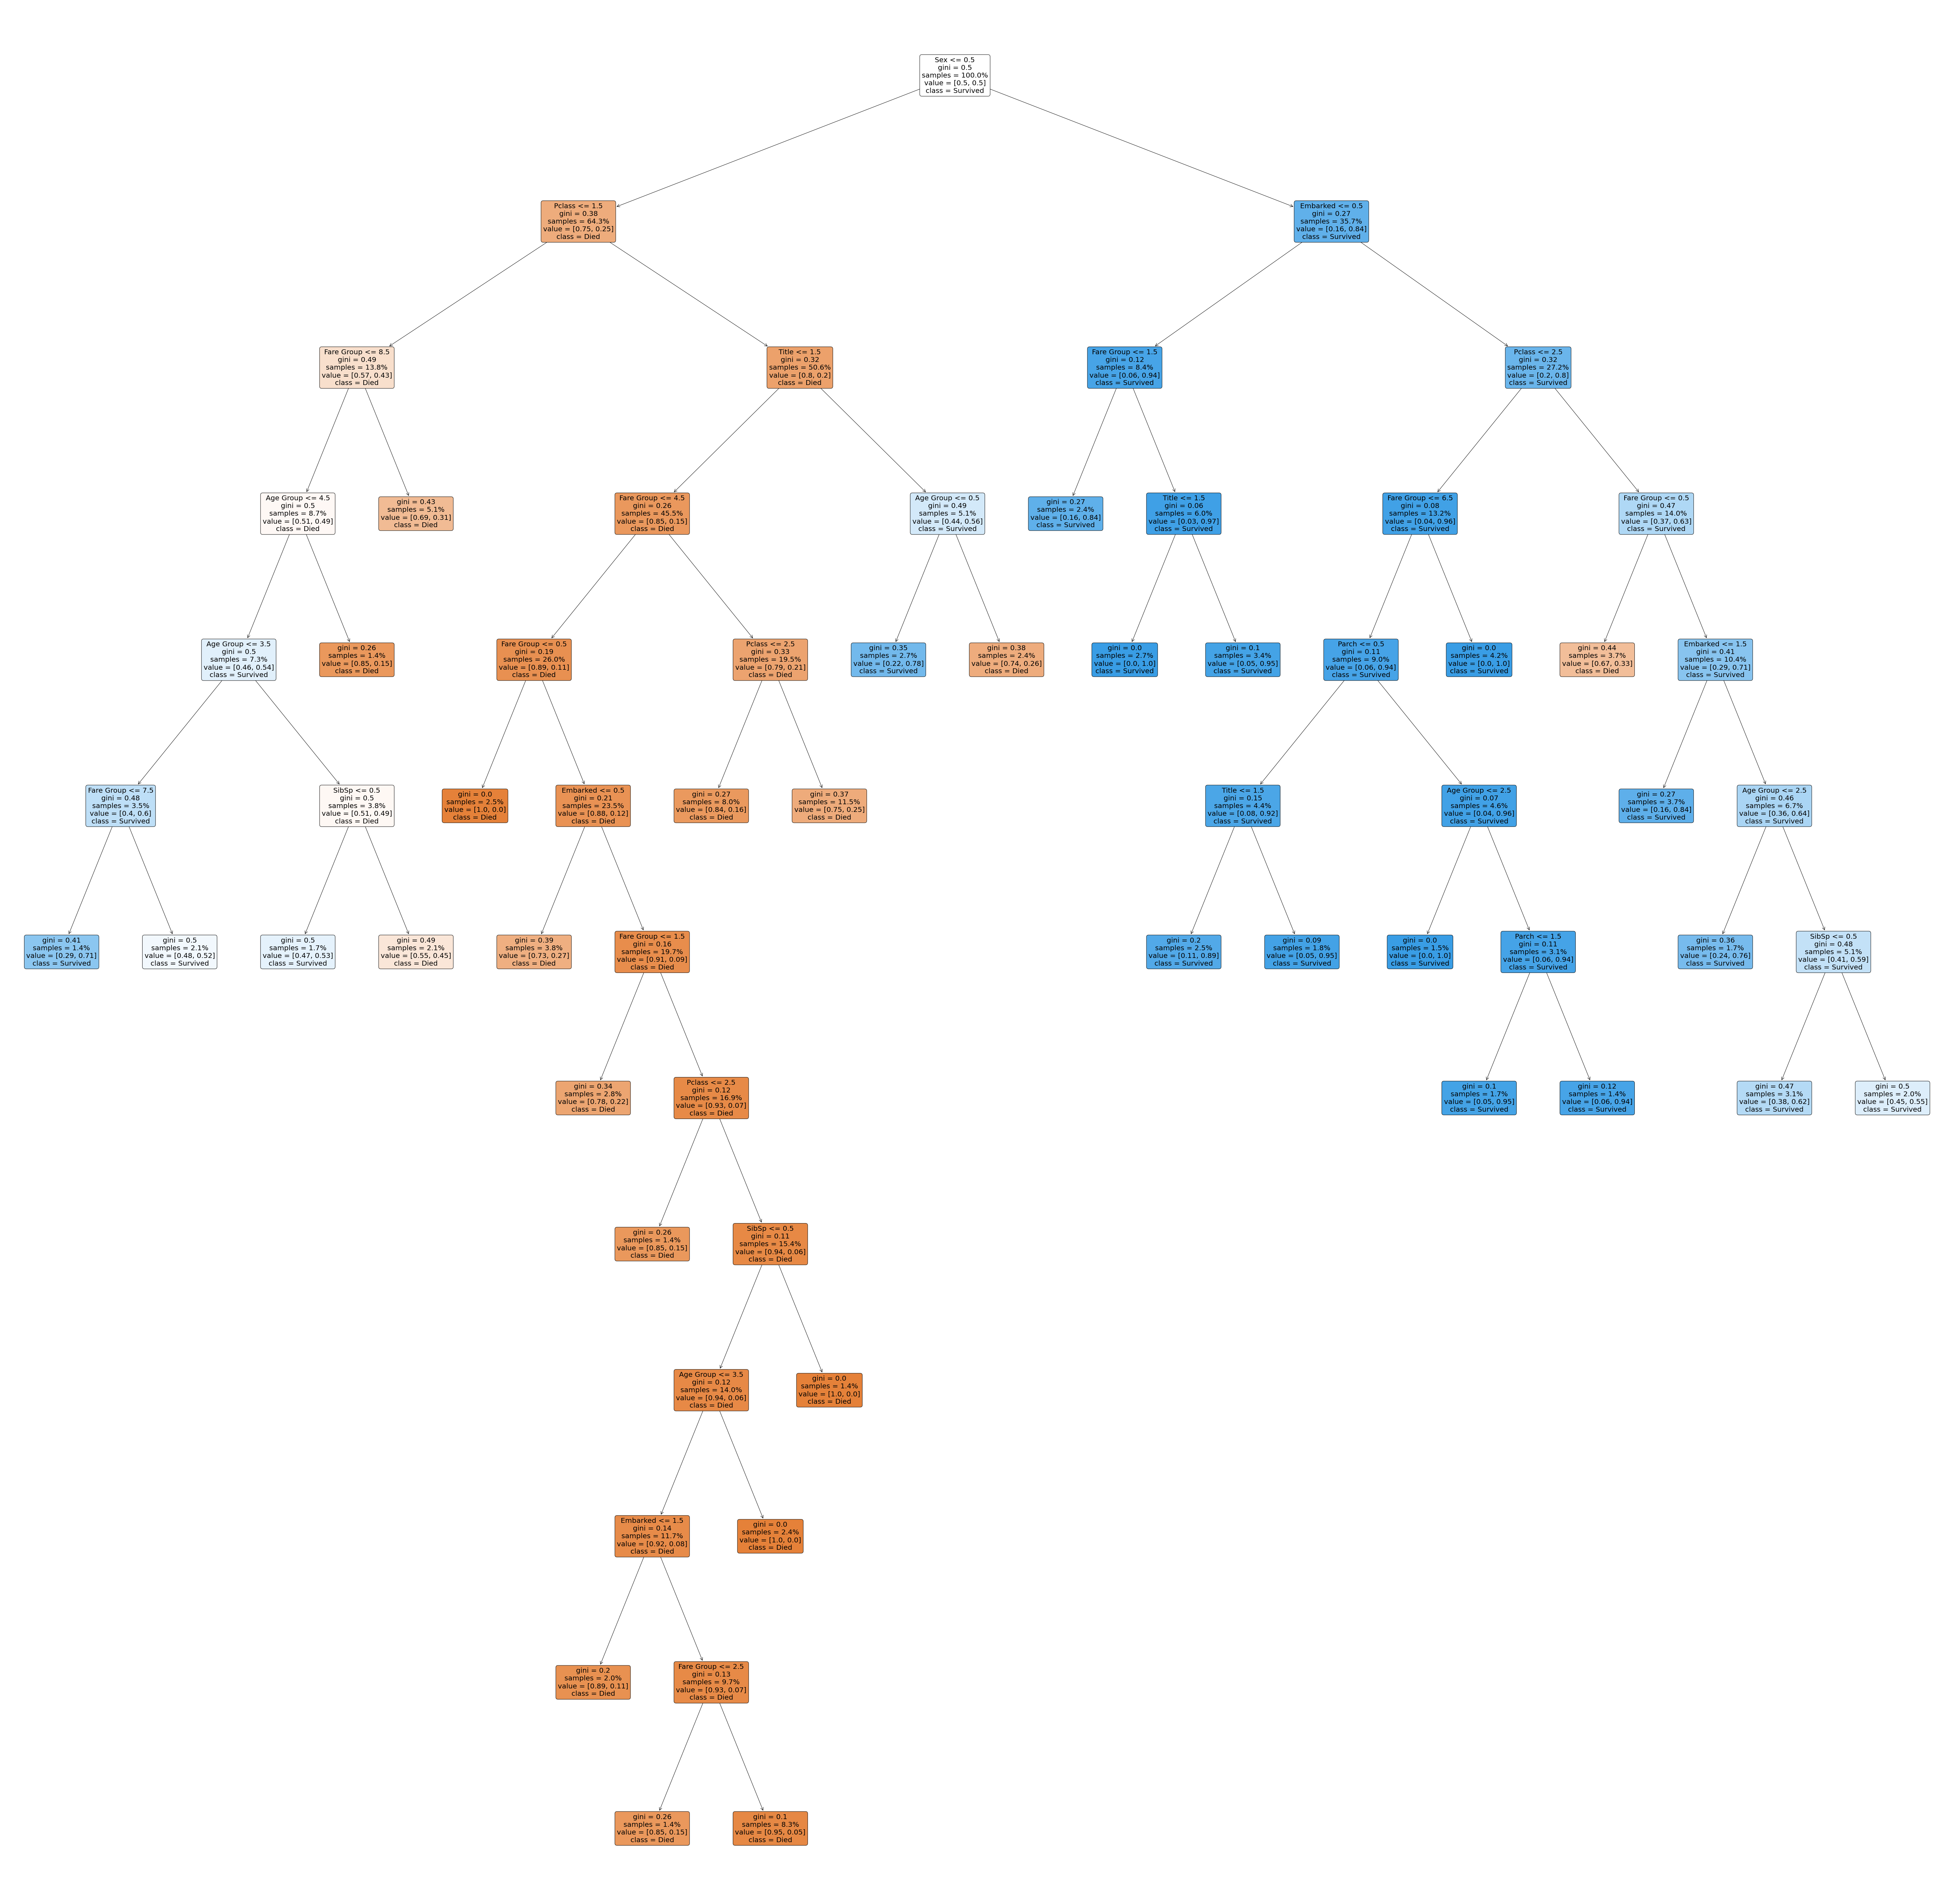

In [101]:
plt.figure(figsize=(100,100))
tree.plot_tree(
    grid_best,
    feature_names = X_train.columns,
    class_names = ["Died", "Survived"],
    filled = True,
    proportion = True,
    rounded = True,
    precision = 2,
    fontsize=20
)

#### Feature Importances

In [97]:
feature_importances = pd.DataFrame(
                            grid_best.feature_importances_,
                            index = X.columns,
                            columns=['importance']
                        )
feature_importances.sort_values(by='importance', ascending=False).head(10)

,importance
Sex,0.678023
Pclass,0.117936
Title,0.063787
Fare Group,0.062209
Age Group,0.047486
Embarked,0.028623
SibSp,0.001440
Parch,0.000495


### Comparing the trees

In [98]:
pd.DataFrame(
    data = {
                "Accuracy on Training Set" : [train_accuracy_cart, 
                                              train_accuracy_id3, 
                                              train_accuracy_grid_best],
                "Accuracy on Testing Set" : [test_accuracy_cart, 
                                              test_accuracy_id3, 
                                              test_accuracy_grid_best],
            },
    index = ["CART", "ID3", "Grid Search"]
)

,Accuracy on Training Set,Accuracy on Testing Set
CART,0.912921,0.748603
ID3,0.912921,0.737430
Grid Search,0.827247,0.776536


CART obtained with Grid Search is the best tree in this case, as the other trees seems to have the problem of overfitting.

## Prediction

In [99]:
surv_pred = grid_best.predict(df2)

survival_predict = pd.DataFrame(
                        data = {
                            "index" : range(0, len(surv_pred), 1),
                            "survival_predict" : surv_pred
                        }
                    )

df_predict = df_predict.reset_index()

final_pred_df = df_predict.merge(survival_predict, on = "index", indicator = False)

In [100]:
final_pred_df.drop(["index"], axis = 1)

,PassengerId,Title,FirstName,LastName,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,survival_predict
0,892,Mr,James,Kelly,3,male,34.500000,0,0,330911,7.8292,Q,0
1,893,Mrs,James (Ellen Needs),Wilkes,3,female,47.000000,1,0,363272,7.0000,S,0
2,894,Mr,Thomas Francis,Myles,2,male,62.000000,0,0,240276,9.6875,Q,0
3,895,Mr,Albert,Wirz,3,male,27.000000,0,0,315154,8.6625,S,0
4,896,Mrs,Alexander (Helga E Lindqvist),Hirvonen,3,female,22.000000,1,1,3101298,12.2875,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,Mr,Woolf,Spector,3,male,30.250000,0,0,A.5. 3236,8.0500,S,0
414,1306,Dona,Fermina,Oliva y Ocana,1,female,39.000000,0,0,PC 17758,108.9000,C,1
415,1307,Mr,Simon Sivertsen,Saether,3,male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,S,0
416,1308,Mr,Frederick,Ware,3,male,30.250000,0,0,359309,8.0500,S,0
